## Exploring Influential Factors: Understanding US Home Price Trends Over 20 Years

The project aims to analyze the impact of key economic and housing market factors on US home prices over the last two decades using the S&P Case-Shiller Home Price Index as a proxy. This study will encompass six major steps. 

* Data Collection and Preprocessing
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Model Building
* Model Evaluation

We've gathered data from various sources for factors influencing US home prices over the past 20 years. The datasets for interest rates, economic indicators, housing supply, mortgage terms and so on have been combined into a single dataset. Access the datasets through the following links:

> Target (S&P/Case-Shiller U.S. National Home Price Index.) https://fred.stlouisfed.org/series/CSUSHPINSA

>All Employees, Residential Building Construction (Thousands of Peoples) (Construction employees in the construction sector include: Working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance etc.) https://fred.stlouisfed.org/series/CES2023610001

> Labor Force Participation Rate (The participation rate is the percentage of the population that is either working or actively looking for work.) https://fred.stlouisfed.org/series/CIVPART

> New Privately-Owned Housing Construction Completed: (Total units in thousands) https://fred.stlouisfed.org/series/COMPUTSA

> Employment- (Population Ratio (emratio)) https://fred.stlouisfed.org/series/EMRATIO

> Gross Domestic Product (Featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.) https://fred.stlouisfed.org/series/GDP

> New Privately-Owned Housing Units Under Construction: Total Units in thousands https://fred.stlouisfed.org/series/HOUST

> Industrial Production: Cement (The industrial production (IP) index measures the real output of all relevant establishments located in the United States) https://fred.stlouisfed.org/series/IPN32731S

> Mortgage Rate (A mortgage rate is the interest rate charged for a home loan.(Percentage)) https://fred.stlouisfed.org/series/MORTGAGE30US

> Monthly Supply of New Houses in the United States (The monthly supply is the ratio of new houses for sale to new houses sold.) https://fred.stlouisfed.org/series/MSACSR

> Median Sales Price. (Median Sales Price of Houses Sold for the United States.(US Dollers)) https://fred.stlouisfed.org/series/MSPUS

> Producer Price Index -Cement Manufacturing https://fred.stlouisfed.org/series/PCU327310327310

> Producer Price Index by Industry: Concrete Brick https://fred.stlouisfed.org/series/PCU32733132733106

> New Privately-Owned Housing Units Authorized in Permit-Issuing Places: (Total Units) https://fred.stlouisfed.org/series/PERMIT 

> Personal Income (Income that persons receive in return for their provision of labor, land, and capital used in current production and the net current transfer payments that they receive from business and from government.) https://fred.stlouisfed.org/series/PI

> Population (Population includes resident population plus armed forces overseas.) https://fred.stlouisfed.org/series/POPTHM

> Personal Saving Rate (Percent) (Personal saving as a percentage of disposable personal income (DPI), frequently referred to as "the personal saving rate," is calculated as the ratio of personal saving to DPI. Personal income that is used either to provide funds to capital markets or to invest in real assets such as residences.) https://fred.stlouisfed.org/series/PSAVERT

> Homeownership Rate (Percentage) (The homeownership rate is the proportion of households that is owner-occupied.) https://fred.stlouisfed.org/series/RSAHORUSQ156S

> New Privately-Owned Housing Units Under Construction: Total Units https://fred.stlouisfed.org/series/UNDCONTSA

> Unemployment Rate (The unemployment rate represents the number of unemployed as a percentage of the labor force. (16 years age or above)) https://fred.stlouisfed.org/series/UNRATE

> All Employees, Construction (Thousands of persons) (Construction employees in the construction sector include: Working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance.) https://fred.stlouisfed.org/series/USCONS

The dataset has been processed in several steps to prepare it for analysis. Firstly, the 'DATE' column has been set as the index for the dataset. Additionally, columns have been renamed for clarity and consistency across the factors. Afterward, the data has been filtered to include records from January 1987 to July 2023, narrowing our focus to the past 20 years. 

The resulting combined dataset appears as follows:

In [72]:
import pandas as pd
import os

df = pd.read_csv("df_final.csv")
df.head()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,1987-01-01,9.4,63.735,9.2040,123.7373,100.1,1690.0,4.703204,241857.0,7974.739004,...,1090.0,4722.156,63.9,1774.0,5007.0,65.4,722.3,6.0,6.6,97900.0
1,1987-02-01,8.2,64.135,9.0825,123.1670,100.8,1689.0,4.703204,242005.0,7502.244305,...,1096.0,4722.156,63.9,1784.0,5038.0,65.5,724.2,6.2,6.6,97900.0
2,1987-03-01,8.1,64.470,9.0350,122.5706,101.2,1704.0,4.703204,242166.0,7106.570176,...,1084.0,4722.156,63.9,1726.0,5039.0,65.5,727.9,6.0,6.6,97900.0
3,1987-04-01,4.1,64.973,9.8325,123.5345,100.8,1601.0,4.703204,242338.0,7316.773819,...,1079.0,4806.160,63.9,1614.0,5053.0,65.4,728.1,6.0,6.3,103400.0
4,1987-05-01,7.8,65.547,10.5960,123.8454,101.2,1500.0,4.697749,242516.0,7203.844501,...,1070.0,4806.160,63.9,1628.0,5080.0,65.7,727.6,6.7,6.3,103400.0


### Exploratory data analysis (EDA)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  439 non-null    object 
 1   p_saving_rate         439 non-null    float64
 2   target                439 non-null    float64
 3   mortgage_rate         439 non-null    float64
 4   IPI_Cement            439 non-null    float64
 5   PPI_Cement            439 non-null    float64
 6   permit                439 non-null    float64
 7   PPI_Concrete          439 non-null    float64
 8   population            439 non-null    float64
 9   new_private_house     439 non-null    float64
 10  emratio               439 non-null    float64
 11  income                439 non-null    float64
 12  new_private_hw_under  439 non-null    float64
 13  GDP                   439 non-null    float64
 14  home_ow_rate          439 non-null    float64
 15  house_st              4

In [3]:
df.describe()

,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,6.148633,141.151487,6.315856,119.565531,176.834228,1355.164009,5.155698,293349.423690,5206.608788,61.368052,...,953.202733,13236.389663,65.777221,1337.020501,6288.307517,65.113440,742.157631,5.876993,5.747153,219945.558087
std,2.075691,60.304741,2.172124,23.911004,57.243653,390.759196,0.272078,28737.180981,1685.524304,2.011510,...,287.403162,5902.255151,1.744104,379.076753,959.538073,1.786754,123.747671,1.675367,1.576956,90045.171678
min,1.400000,63.735000,2.684000,66.350800,100.100000,513.000000,4.697749,241857.000000,1685.483171,55.025000,...,414.000000,4722.156000,63.100000,478.000000,4570.000000,60.100000,542.600000,3.300000,3.400000,97900.000000
25%,4.900000,81.733000,4.316250,101.180200,129.200000,1089.500000,4.958640,268602.000000,4145.299395,59.750000,...,760.000000,7868.468000,64.100000,1103.000000,5424.500000,63.100000,633.150000,4.500000,4.600000,138000.000000
50%,6.100000,141.048000,6.262000,116.904800,171.800000,1381.000000,5.101085,295359.000000,5306.412981,61.900000,...,973.000000,12922.656000,65.500000,1377.000000,6402.000000,66.000000,734.300000,5.600000,5.400000,219000.000000
75%,7.450000,178.937000,7.838000,139.426100,210.050000,1624.000000,5.337538,319331.500000,6357.205695,62.900000,...,1123.000000,17518.508000,67.400000,1582.500000,7092.000000,66.500000,826.250000,6.800000,6.600000,281000.000000
max,11.275000,310.162000,11.260000,192.032200,331.181000,2263.000000,5.821432,335329.000000,10017.121097,64.700000,...,1667.500000,27623.543000,69.400000,2273.000000,7967.000000,67.300000,1022.000000,10.250000,9.600000,479500.000000


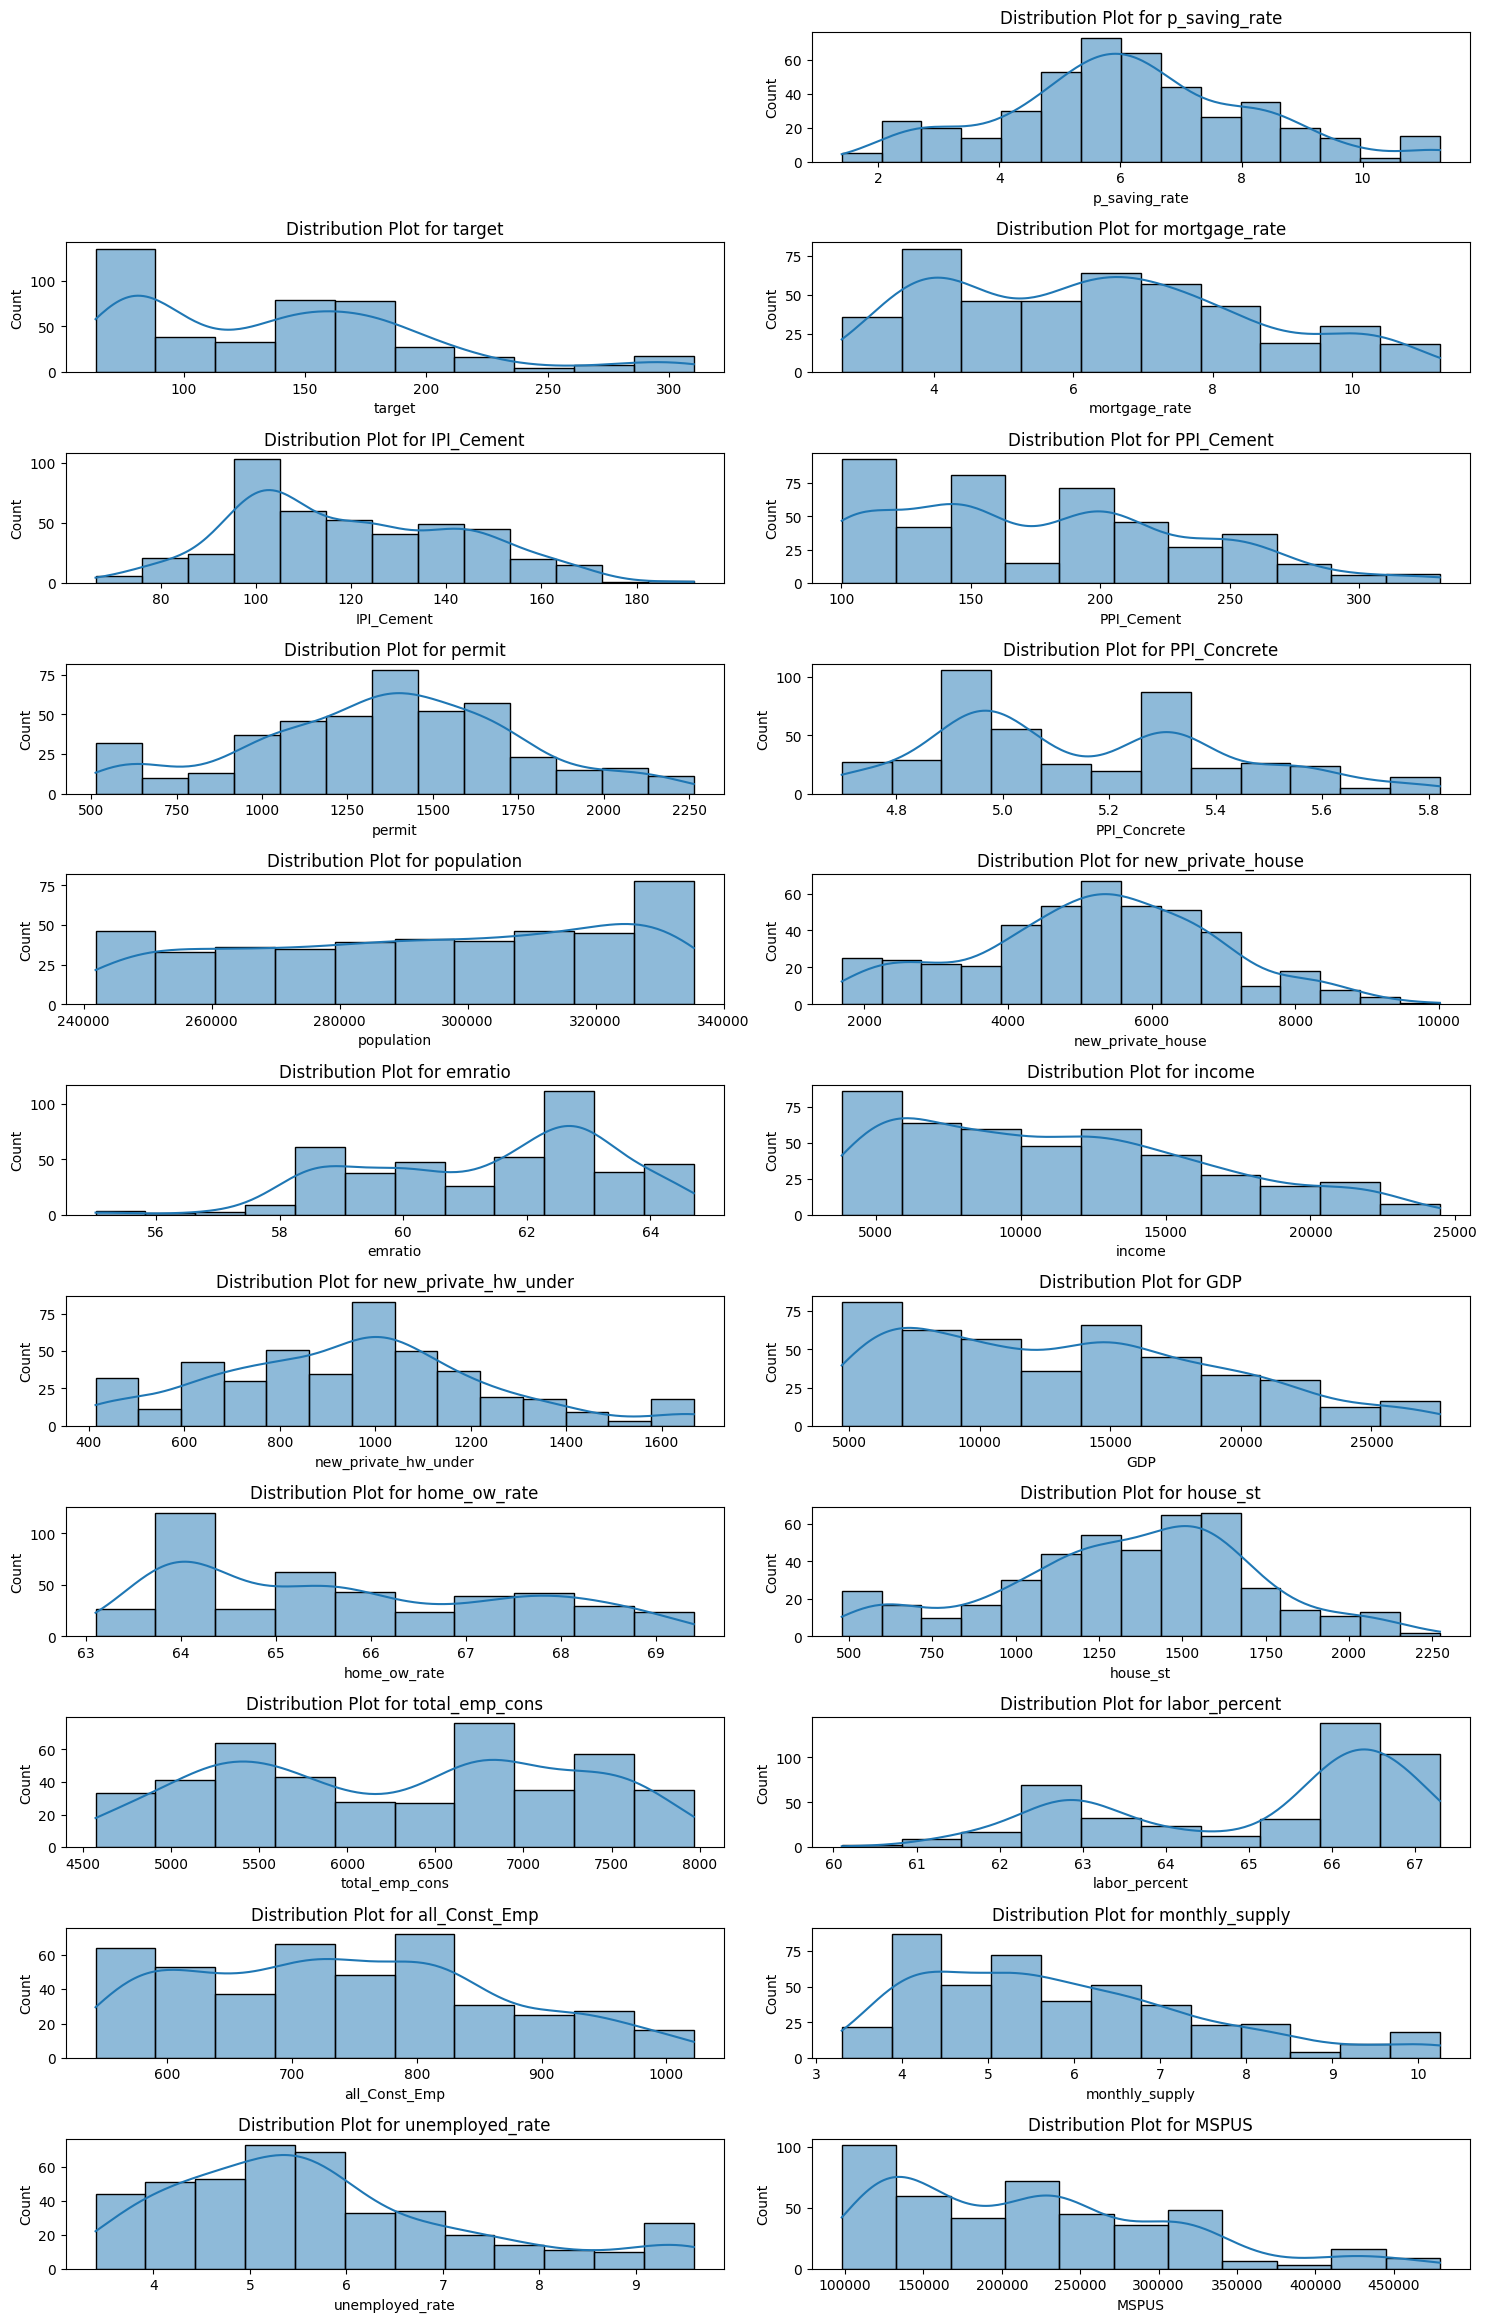

In [12]:
# Plotting hist graph for every feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 25))

for col in df.columns:
    if col != "DATE":
        plt.subplot(len(df.columns) // 2 + 1, 2, list(df.columns).index(col) + 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.xlabel(f"{col}")
        plt.ylabel("Count")
        plt.title(f"Distribution Plot for {col}")

plt.tight_layout()
plt.show()

### Understanding the Correlations between the data

In [54]:
# Correlation of each feature with the target column
temp_df = df.drop("DATE", axis=1)
corr_matrix = temp_df.corr()
corr_matrix["target"].sort_values(ascending=False)[1:]

MSPUS                   0.980144
PPI_Cement              0.964074
GDP                     0.960633
income                  0.955608
PPI_Concrete            0.939072
population              0.896974
total_emp_cons          0.812130
new_private_hw_under    0.634935
all_Const_Emp           0.560479
home_ow_rate            0.207294
monthly_supply          0.169504
permit                  0.127189
house_st               -0.001742
new_private_house      -0.068468
unemployed_rate        -0.249211
IPI_Cement             -0.260807
p_saving_rate          -0.286001
emratio                -0.538776
mortgage_rate          -0.730709
labor_percent          -0.788313
Name: target, dtype: float64

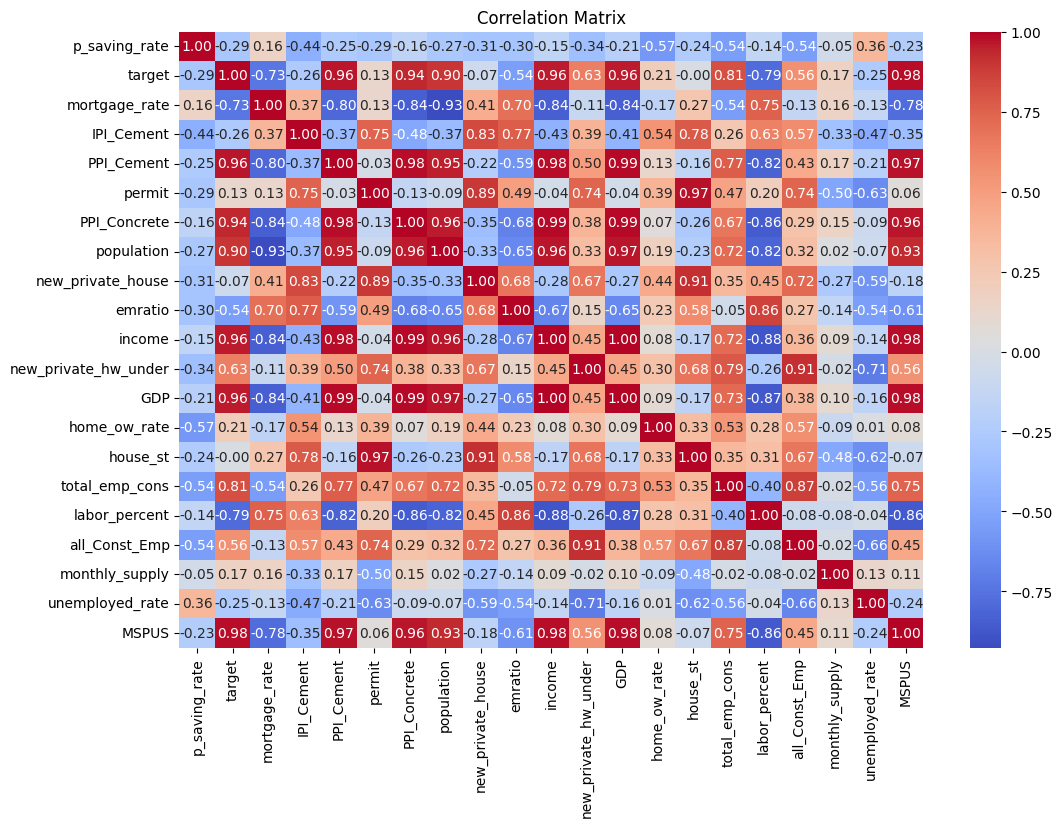

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Breakdown of correation of each factor with the target column

**Positive Impact:**
Higher Prices: Factors like MSPUS (Median Sales Price of Houses Sold), GDP, Income, and certain construction-related metrics like PPIs and population tend to push house prices upward.

**Moderate Influence:**
Moderate Impact: Other construction-related indicators like employment in construction, new housing units under construction, and total construction employees also contribute positively but not as strongly as the above factors.

**Weak Influence:**
Mild Impact: Factors like homeownership rates, monthly housing supply, and building permits have a relatively minor positive effect on house prices.

**Negative Impact:**
Lower Prices: Certain factors like higher mortgage rates, unemployment rates, and lower labor force participation tend to bring house prices down.

So, in a nutshell, economic growth, higher income, certain construction activities, and market demand tend to drive prices up. On the flip side, higher mortgage rates, unemployment, and lower participation in the labor force can bring prices down.

### Modelling

In [41]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [73]:
# Splitting the dataset into train and test sets
X = df.drop(columns=["DATE", "target"], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
# Normalization using StandardScalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Fit the model to the training data, here RandomForestRegressor
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

In [45]:
# Make predictions using the test set
random_forest_predictions = random_forest.predict(X_test)

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, random_forest_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, random_forest_predictions)
cross_val_scores = cross_val_score(random_forest, X_train, y_train, cv=5)

mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean Squared Error (MSE): 5.42
RMSE: 2.33
R-squared (R2): 1.00
Mean R-squared: 0.9992
Standard Deviation of R-squared: 0.0003


These scores suggest that the Random Forest Regression model is an excellent fit for the data, accurately predicting the target variable with very high precision.

### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Randomized Search Cross Validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = rf_random.best_params_
best_model = rf_random.best_estimator_

# Evaluate the best model
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)


In [98]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)

mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean Squared Error (MSE): 40.93
RMSE: 6.40
R-squared (R2): 0.99
Mean R-squared: 0.9992
Standard Deviation of R-squared: 0.0002


In [101]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

models = [
    LinearRegression(),
    Ridge(tol=0.0100),
    Lasso(tol=0.0100),
    ElasticNet(tol=0.0100)
]

model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "ElasticNet"
]

model_scores = {}

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    model_scores[model_names[i]] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

scores_df = pd.DataFrame(model_scores).T

In [104]:
scores_df

,MSE,RMSE,R2
Linear Regression,14.102755,3.755363,0.996624
Ridge Regression,19.201820,4.381988,0.995404
Lasso Regression,51.840110,7.200008,0.987592
ElasticNet,40.931045,6.397737,0.990203
Random Forest Regressor,40.931045,6.397737,0.990203


### Feature Importance

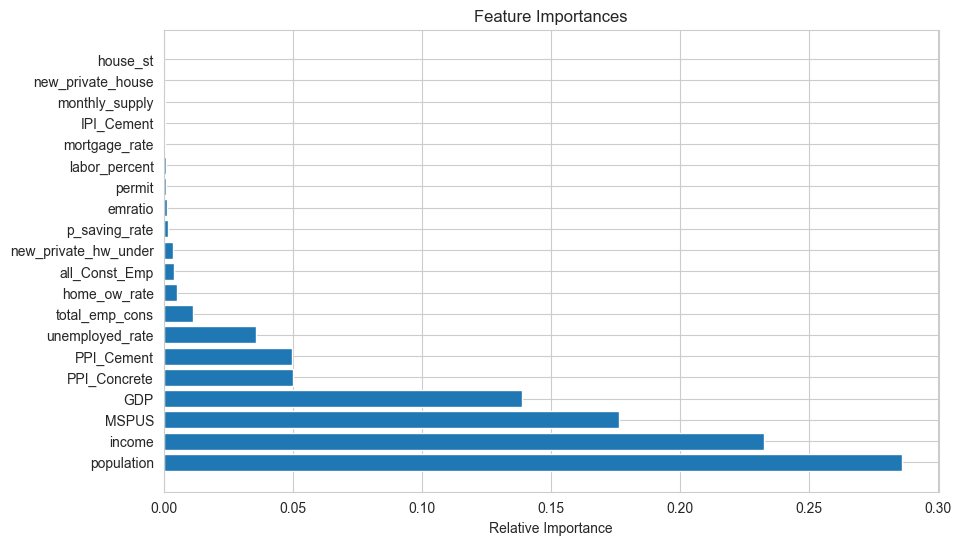

In [105]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()

The model highlights that areas with more people tend to have higher home prices. It suggests population changes strongly impact how home prices move. However, while population stands out, it's just one part of the picture. Other factors like income, GDP, etc also play roles in determining home prices.

Also, when house_st reflecting the count of new housing projects started, has less importance in predicting home prices, it implies that the number of new housing initiatives might not strongly influence or forecast changes in home prices as per this model. Essentially, this suggests that in the context of predicting home prices, the quantity of new housing projects commenced doesn't seem to be a major driving factor based on this analysis.

<center>--------------------------------------------------------------------------------------------------</center>